In [0]:
#ドライブをマウント

from google.colab import drive
drive.mount('./drive')

#以下のlinuxコマンドでマウントを確認できる

Drive already mounted at ./drive; to attempt to forcibly remount, call drive.mount("./drive", force_remount=True).


<Figure size 432x288 with 0 Axes>

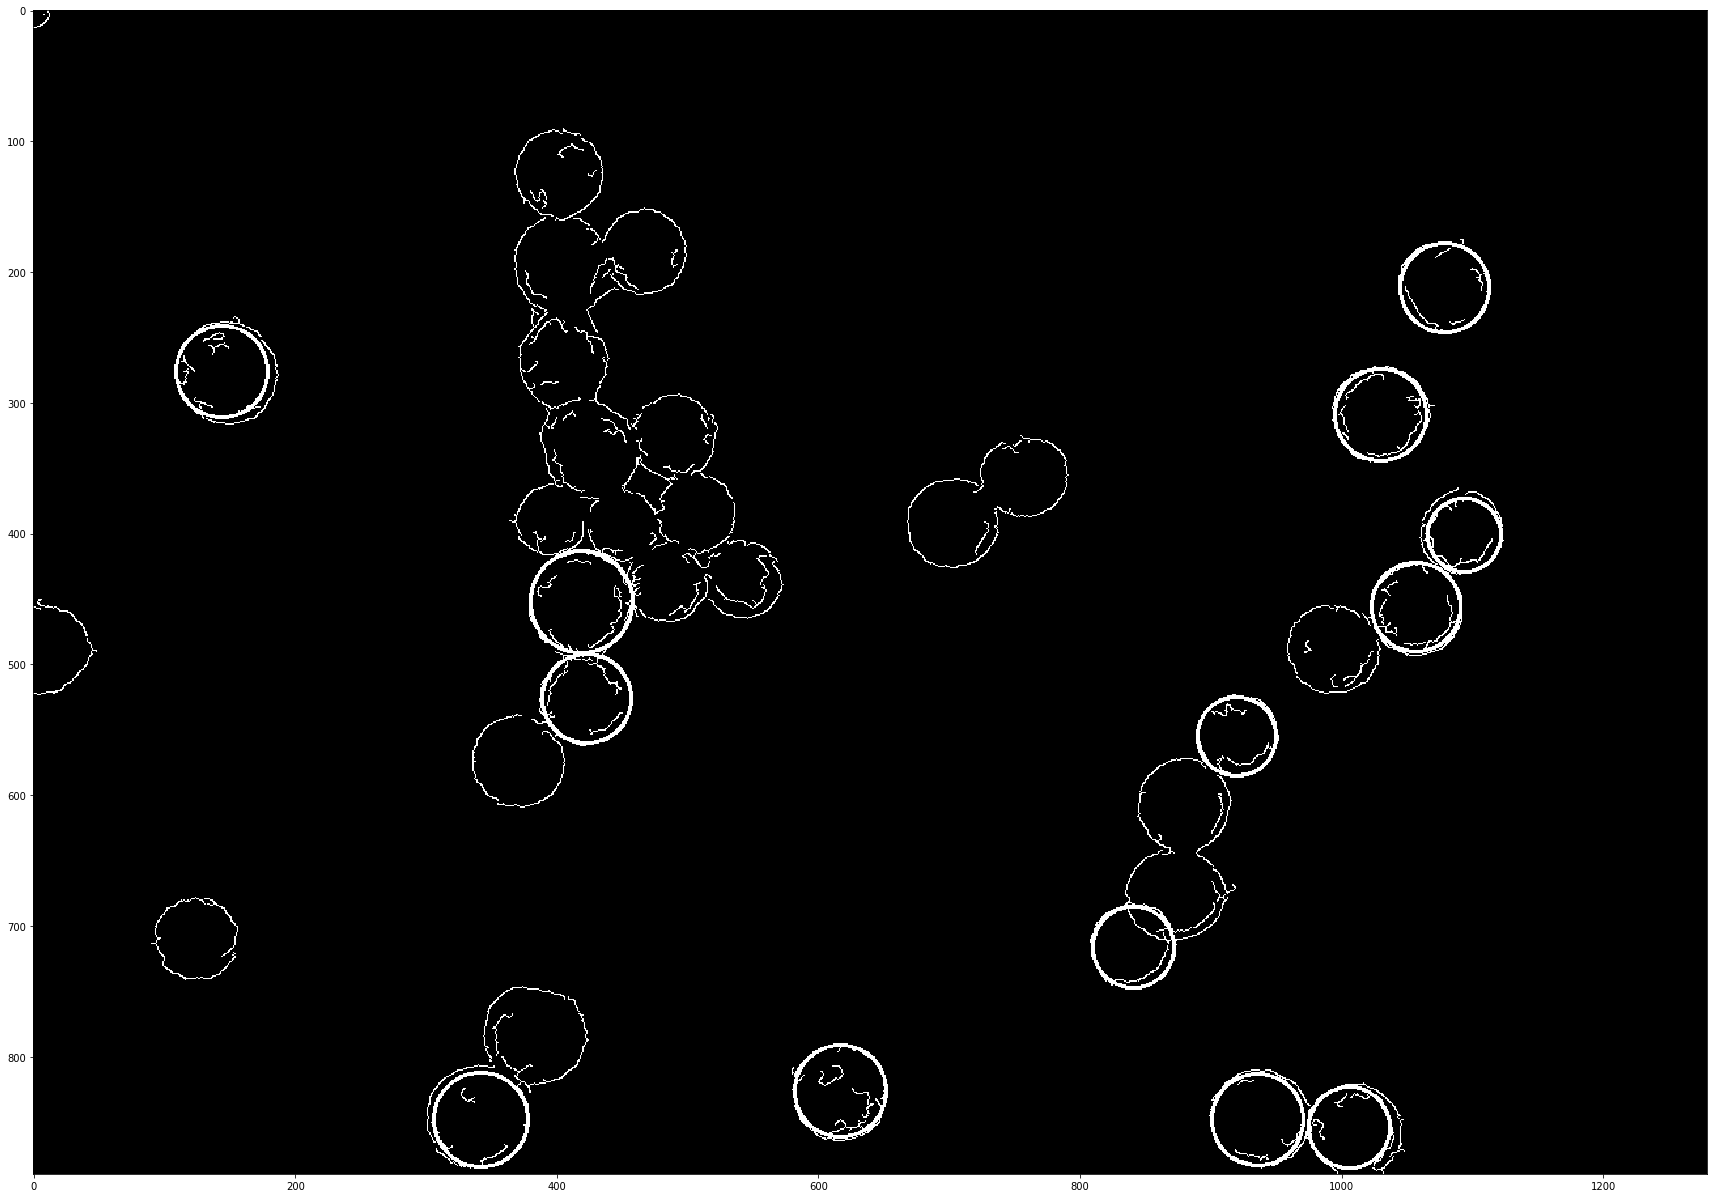

magnification is x15k
number of circles detected: 13


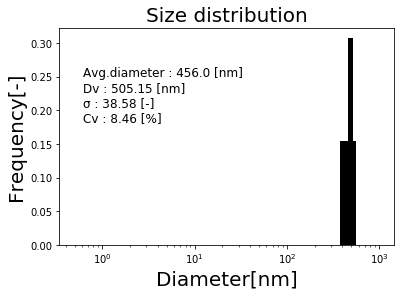

In [0]:
%matplotlib inline
import cv2
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt
from statistics import stdev
plt.gray()


list1 = ['/content/drive/My Drive/sample3.tif']


while bool(list1) == True:
  radius = []
  image = Image.open(list1[0], 'r')
  # 入力画像の読み込み
  img = cv2.imread(list1[0])
  #print(img)
  img2 = img[0:890, 0:1280]
  img_preprocessed = cv2.cvtColor(cv2.GaussianBlur(img2, (7, 7), 0), cv2.COLOR_BGR2GRAY)
  # find binary image with edges
  img_edges = cv2.Canny(img_preprocessed, threshold1=20, threshold2=50)
  circles = cv2.HoughCircles(img_edges, cv2.HOUGH_GRADIENT, dp=2.2, minDist=50, minRadius=10,
                             maxRadius=60)
  radius.extend(circles[0][:, 2])
  img_circles = np.copy(img_edges)
  if circles is not None and len(circles) > 0:
      circles = circles[0]
      for (x, y, r) in circles:
          cv2.circle(img_circles, (x, y), r, (255, 255, 0), 2)
  fig = plt.figure(figsize=(30,35))
  plt.imshow(img_circles)
  plt.show()
  del list1[0]

magnification = '15'
print('magnification is x' + magnification + 'k')
numbers = len(radius)
diameter = [i * 200 / float(magnification) for i in radius]
volume = [i * i * i * 4 / 3 for i in diameter]
#print(diameter)
#print(volume)
print('number of circles detected: %d' % numbers)

average_diameter = sum(diameter) / numbers
dv = (sum(volume) / numbers) ** (1 / 3)
standard_deviation = stdev(diameter)
cv = standard_deviation / average_diameter * 100

fig, ax = plt.subplots()

plt.rcParams['font.family'] = 'Arial'
ax.hist(diameter, density=True, bins=2000, range=(0, 1000), width=40, color='#000000')
plt.xscale("log")
plt.title('Size distribution', fontsize=20)
plt.xlabel("Diameter[nm]", fontsize=20)
plt.ylabel("Frequency[-]", fontsize=20)
ax.text(0.07, 0.5, "Avg.diameter : " + str(round(average_diameter, 2)) + ' [nm]\nDv : ' + str(
    round(dv, 2)) + ' [nm]\nσ : ' + str(round(standard_deviation, 2)) + ' [-]\nCv : ' + str(
    round(cv, 2)) + ' [%]\n', transform=ax.transAxes, fontsize=12)

plt.show()

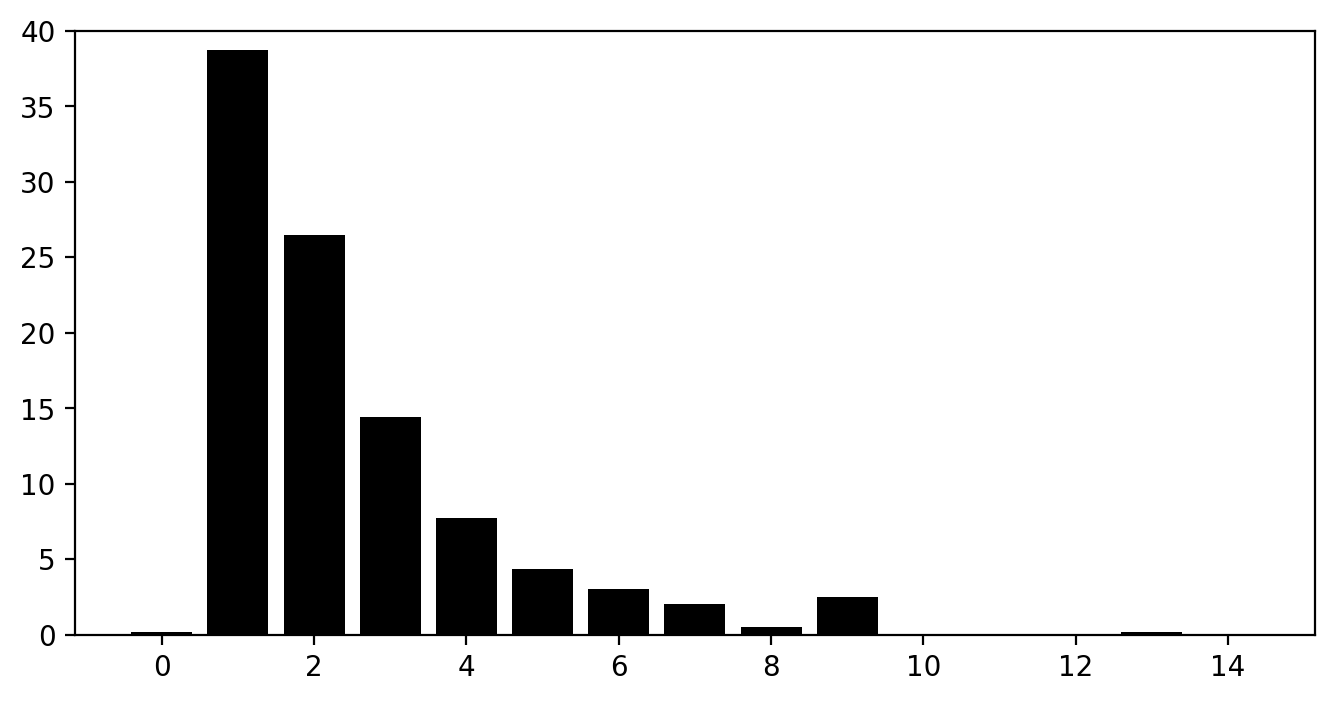

In [0]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')

x = [i for i in range(15)]
y = [0.167504188, 38.69346734, 26.46566164, 14.40536013, 7.70519263, 4.355108878, 3.015075377, 2.010050251, 0.502512563, 2.512562814, 0, 0, 0, 0.167504188, 0]

plt.figure(figsize=(8, 4), dpi=200)
plt.ylim(0,40)
plt.bar(x,y, color='black')
plt.show()
plt.savefig('/content/drive/My Drive/Au_numbers_distribusion.jpg')

In [0]:
a = 5
b = [3,8,7,5,5]

for i in range(len(b)):
    b[i] = int(b[i])

c = []
c_odd = 0
c_even = 0
for j in range(len(b)):
    if j % 2 != 0:
        c_odd = c_odd + b[j]
    else:
        c_even = c_even + b[j]
    
c_0 = c_even - c_odd
c.append(c_0)

for k in range(len(b) - 1):
    c.append(int(2 * (b[k] - c[k] / 2)))

for l in range(len(c)):
  c[l] = str(c[l])

print(' '.join(c))

2 4 12 2 8


In [0]:
a = [[1,2],[2,3],[3,4]]
b = 4
c = 3

d = a[0][0]
e = []
f = []
g = []
num = c

for roop in range(b - 1):
  #print(num,d,e,f,g)
  for i in range(len(a)):
    for j in range(2):
      if a[i][j] == d:
        if j != 0 and a[i][0] not in f:
          e.append(a[i][0])
          print(num,d,e,f,g)
        elif j == 0 and a[i][1] not in f:
          e.append(a[i][1])
          print(num,d,e,f,g)

'''          
  for k in range(len(e)):
    if roop == b - 1:
      num = num * (c - k - (len(e) + len(f))
    #else:
      #num = num * (c - k)
  
  g = f.copy()
  f = []
  f.append(d)
  d = e.pop(0)
'''

3 1 [2] [] []
3 1 [2, 2] [] []
3 1 [2, 2, 2] [] []


'          \n  for k in range(len(e)):\n    if roop == b - 1:\n      num = num * (c - k - (len(e) + len(f))\n    #else:\n      #num = num * (c - k)\n  \n  g = f.copy()\n  f = []\n  f.append(d)\n  d = e.pop(0)\n'

In [0]:
a = [[1,2],[2,3],[3,4]]
b = 4
c = 3


d = [[] for i in range(b)]
e = [0 for i in range(1, b + 1)]
for i in range(len(a)):
  d[a[i][0] - 1].append(a[i][1])
  d[a[i][1] - 1].append(a[i][0])

print(d,e)

ans = 1
for j in range(b):

  for k in range(len(d[j])):
    color_num = c - 2
    if j == 0:
      color_num = c - 1
    print(j,k)
    if e[d[j][k] - 1] == 1:
      pass
    else:
      ans = ans * color_num
      color_num = color_num - 1
      ans = ans % 1000000007
      e[d[j][k] - 1] = 1
      print(ans)

print(ans * c)
  



[[2], [1, 3], [2, 4], [3]] [0, 0, 0, 0]
0 0
2
1 0
2
1 1
2
2 0
2 1
2
3 0
6


In [0]:
a, b = input().split(' ')
a = int(a)
b = int(b)
c = []

for num in range(a - 1):
    c.append(list(map(int, input().split())))
    
#print(c)
d = [[] for i in range(a)]
e = [0 for i in range(1, a + 1)]
for i in range(len(c)):
  #print(c[i][0] - 1,c[i][1] - 1)
  d[c[i][0] - 1].append(c[i][1])
  d[c[i][1] - 1].append(c[i][0])

e[0] = 1

def dfs(j):
    ans = 1
    while(0 in e):
        color_num = b - 2
        if j == 0:
          color_num = b - 1

        ans = ans * color_num
        color_num = color_num - 1
        ans = ans % 1000000007
        for l in range(len(d[j])):
            if e[d[j][l] - 1] != 1:
                e[d[j][l] - 1] = 1
                j = d[j][l] - 1
                dfs(j)
    return ans

answer = dfs(0)

print(answer * b % 1000000007)


KeyboardInterrupt: ignored

In [0]:
c = [[1,2],[2,3],[3,4],[4,5],[2,6]]
a = 6
b = 3


d = [[] for i in range(a)]
e = [0 for i in range(a)]
for i in range(len(c)):
  #print(c[i][0] - 1,c[i][1] - 1)
  d[c[i][0] - 1].append(c[i][1])
  d[c[i][1] - 1].append(c[i][0])

e[0] = 1

def dfs(j):
    ans = 1
    while(0 in e):
        color_num = b - 2
        if j == 0:
          color_num = b - 1

        ans = ans * color_num
        color_num = color_num - 1
        ans = ans % 1000000007
        for l in range(len(d[j])):
            if e[d[j][l] - 1] != 1:
                e[d[j][l] - 1] = 1
                j = d[j][l] - 1
                dfs(j)
    return ans

answer = dfs(0)

print(answer * b % 1000000007)


KeyboardInterrupt: ignored